<h1 style='color: blue; font-size: 36px; font-weight: bold;'>Caso House Rocket Company</h1>

# Objetivo

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Fomos contratados como Cientista de Dados por uma empresa fictícia conhecida como House Rocket Company. O nosso objetivo é descobrir oportunidades de negócio no mercado de imóveis como, comprar casas com boa avaliação por um valor acessível e revendê-las à valores mais elevados, visando promover o aumento da receita da empresa.

# Obtenção dos dados

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O conjunto de dados com o qual iremos trabalhar está disponível na plataforma do Kaggle, e pode ser acessado por meio do link: 

https://www.kaggle.com/harlfoxem/housesalesprediction

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Esse conjunto de dados contém o valor de venda de casas entre maio de 2014 e maio de 2015, na região do Condado de King, no estado americano de Washington, nos Estados Unidos da América.

# Apresentação dos dados

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Nesta seção iremos observar de forma geral os dados presentes no dataset. Assim, teremos uma noção maior dos dados que possuímos e como eles nos são apresentados.

## Importando as bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

sns.set_style("darkgrid")
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

## Visualizando os dados

In [3]:
dados = pd.read_csv('./data/kc_house_data.csv', sep=',')
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
num_linha = dados.shape[0]
num_coluna = dados.shape[1]
print(f' O DataFrame possui {num_linha} linhas e {num_coluna} colunas')

 O DataFrame possui 21613 linhas e 21 colunas


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Como podemos observar, em nosso DataFrame possuímos as seguintes colunas:
    
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
 <li><b>id</b>: Representa o código ID de cada imóvel vendido</li>
 <li><b>date</b>: Representa a data da venda do imóvel</li>
 <li><b>price</b>: Representa o preço do imóvel vendido</li>
 <li><b>bedrooms</b>: Representa o número de quartos</li>
 <li><b>bathrooms</b>: Representa o número de banheiros</li>
 <li><b>sqft_living</b>: Representa a área habitável do imóvel (pés²)</li>
 <li><b>sqft_lot</b>: Representa a área do terreno do imóvel (pés²)</li>
 <li><b>floors</b>: Representa o número de andares</li>
 <li><b>waterfront</b>: Indica se o imóvel possui ou não vista para o mar. Se sim o valor é 1, caso contrário 0</li>
 <li><b>view</b>: Representa um índice de 0 a 4 avaliando a vista do imóvel</li>
 <li><b>condition</b>: Representa um índice de 1 a 5 avaliando o estado do imóvel</li>
 <li><b>grade</b>: Representa a nota do imóvel</li>
 <li><b>sqft_above</b>: Representa a área do imóvel que está acima do solo (pés²)</li>
 <li><b>sqft_basement</b>: Representa a área do imóvel que está abaixo do solo (pés²)</li>
 <li><b>yr_built</b>: Representa o ano em que o imóvel foi construído</li>
 <li><b>yr_renovated</b>: Representa o ano da última reforma do imóvel</li>
 <li><b>zipcode</b>: Representa o número da Zona de Informação Postal (equivalente ao CEP) do imóvel</li>
 <li><b>lat</b>: Representa a latitude do imóvel</li>
 <li><b>long</b>: Representa a longitude do imóvel</li>
 <li><b>sqft_living15</b>: Representa a área habitável dos 15 imóveis mais próximos (pés²)</li>
 <li><b>sqft_lot15</b>: Representa a área do lote dos 15 imóveis mais próximos (pés²)</li>

# Limpeza dos dados

## Verificação de missings

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Primeiro devemos verificar se existem dados nulos ou faltantes.

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Correção da data

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Não existem valores nulos em nosso Dataset, mas durante a visualização dos dados podemos observar alguns valores com formatos diferentes, como é o caso da variável <b>date</b>, sendo do tipo object.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Devemos transformar essa variável para melhorar nossa análise. Aparentemente todos os valores dessa variável possuem o mesmo padrão, sendo este, ano, mês, dia e um texto composto por "T00000".

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Vamos remover esse texto ao final de cada valor e separar essa coluna em 3, uma para o ano, uma para o mês e uma para o dia.

In [6]:
dados['date'] = dados['date'].str.split(pat='T00000', expand=True)[0]
dados['date'] = pd.to_datetime(dados['date'])
dados['yr_date'] = dados['date'].dt.year
dados['mon_date'] = dados['date'].dt.month
dados['day_date'] = dados['date'].dt.day
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_date,mon_date,day_date
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


## Estatísticas Descritivas

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
A variável mais importante para nós é o preço dos imóveis, portanto precisamos entender seu comportamento para que possamos identificar alguma quebra de estrutura. Porém antes de focar somente no preço, vamos verificar as estatísticas descritivas de todas as variáveis a fim de encontrar possíveis indicativos de inconsistências.

In [7]:
dados.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_date,mon_date,day_date
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,...,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,...,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46,2014.32,6.57,15.69
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,...,29.37,401.68,53.51,0.14,0.14,685.39,27304.18,0.47,3.12,8.64
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,...,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00,2014.00,1.00,1.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,...,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00,2014.00,4.00,8.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,...,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00,2014.00,6.00,16.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,...,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00,2015.00,9.00,23.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,...,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00,2015.00,12.00,31.00


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Podemos observar uma variação muito elevada dos preços, o valor mínimo está muito distante do valor máximo, o que pode indicar uma assimetria à direita.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Outro ponto que podemos observar é a presença de imóveis que não possuem quartos e banheiros, o que pode ser um erro. Ainda sobre os quartos, vemos que existe um imóvel com o número estranho de 33 quartos.

## Eliminando Valores

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Como visto no item anterior, existem alguns valores que aparentam ser erros, portanto vamos tentar identificar esses valores e excluir de nosso dataset.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Faremos uma consulta em nosso dataset para analisar os imóveis que não possuem quartos, banheiros, e o imóvel que apresenta 33 quartos.

In [8]:
zero_quarto = dados.query('bedrooms == 0')
zero_quarto

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_date,mon_date,day_date
875,6306400140,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,...,1990,0,98102,47.6362,-122.322,2360,4000,2014,6,12
3119,3918400017,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,2,...,2006,0,98133,47.7145,-122.356,1470,1399,2015,2,5
3467,1453602309,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,0,...,1999,0,98125,47.7222,-122.290,1430,1650,2014,8,5
4868,6896300380,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,...,1953,0,98118,47.5260,-122.261,2170,6000,2014,10,2
6994,2954400190,2014-06-24,1295650.0,0,0.00,4810,28008,2.0,0,0,...,1990,0,98053,47.6642,-122.069,4740,35061,2014,6,24
8477,2569500210,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,...,1985,0,98042,47.3473,-122.151,2500,8751,2014,11,17
8484,2310060040,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,...,2003,0,98038,47.3493,-122.053,1810,5685,2014,9,25
9773,3374500520,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,...,1990,0,98031,47.4095,-122.168,2520,8050,2015,4,29
9854,7849202190,2014-12-23,235000.0,0,0.00,1470,4800,2.0,0,0,...,1996,0,98065,47.5265,-121.828,1060,7200,2014,12,23
12653,7849202299,2015-02-18,320000.0,0,2.50,1490,7111,2.0,0,0,...,1999,0,98065,47.5261,-121.826,1500,4675,2015,2,18


In [9]:
dados = dados.drop(zero_quarto.index)

In [10]:
zero_banheiro = dados.query('bathrooms == 0')
zero_banheiro

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_date,mon_date,day_date
1149,3421079032,2015-02-17,75000.0,1,0.0,670,43377,1.0,0,0,...,1966,0,98022,47.2638,-121.906,1160,42882,2015,2,17
5832,5702500050,2014-11-04,280000.0,1,0.0,600,24501,1.0,0,0,...,1950,0,98045,47.5316,-121.749,990,22549,2014,11,4
10481,203100435,2014-09-18,484000.0,1,0.0,690,23244,1.0,0,0,...,1948,0,98053,47.6429,-121.955,1690,19290,2014,9,18


In [11]:
dados = dados.drop(zero_banheiro.index)

In [12]:
quarto_33 = dados.query('bedrooms == 33')
quarto_33

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_date,mon_date,day_date
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,1947,0,98103,47.6878,-122.331,1330,4700,2014,6,25


In [13]:
dados = dados.drop(quarto_33.index)

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Esse dados parecem ser inconsistentes pois alguns imóveis possuem uma área habitável grande e nenhum quarto ou banheiro foi construído. Além disso nosso dataset possui imóveis residenciais, e realmente é estranho que existam imóveis desse tipo que não possuam esses cômodos. 
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O imóvel que apresentou 33 quartos possui uma área habitável muito pequena para esse número de quartos. Portando todos esses dados foram excluídos de nosso conjunto.

# Análise Exploratória dos dados

## Matriz de Correlação

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Podemos encontrar a correlação entre as variáveis por meio de uma matriz de correlação, assim entendemos melhor como as variáveis se influenciam, e como as variáveis auxiliares influenciam a variável dependente <b>price</b>.

In [14]:
dados_corr = dados.corr().round(4)
dados_corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_date,mon_date,day_date
id,1.0000,-0.0167,0.0023,0.0051,-0.0123,-0.1319,0.0186,-0.0027,0.0115,-0.0237,...,0.0216,-0.0169,-0.0082,-0.0018,0.0206,-0.0027,-0.1386,0.0099,-0.0116,0.0022
price,-0.0167,1.0000,0.3160,0.5259,0.7019,0.0899,0.2568,0.2664,0.3973,0.0360,...,0.0540,0.1264,-0.0534,0.3068,0.0221,0.5853,0.0828,0.0038,-0.0100,-0.0147
bedrooms,0.0023,0.3160,1.0000,0.5279,0.5932,0.0336,0.1837,-0.0069,0.0824,0.0234,...,0.1607,0.0192,-0.1586,-0.0116,0.1366,0.4045,0.0319,-0.0091,-0.0008,-0.0095
bathrooms,0.0051,0.5259,0.5279,1.0000,0.7558,0.0884,0.5026,0.0637,0.1884,-0.1264,...,0.5072,0.0505,-0.2048,0.0243,0.2249,0.5699,0.0883,-0.0266,0.0075,-0.0051
sqft_living,-0.0123,0.7019,0.5932,0.7558,1.0000,0.1734,0.3539,0.1039,0.2847,-0.0594,...,0.3181,0.0553,-0.1998,0.0522,0.2412,0.7564,0.1843,-0.0290,0.0121,-0.0074
sqft_lot,-0.1319,0.0899,0.0336,0.0884,0.1734,1.0000,-0.0048,0.0216,0.0749,-0.0088,...,0.0529,0.0077,-0.1296,-0.0855,0.2302,0.1448,0.7182,0.0056,-0.0026,0.0003
floors,0.0186,0.2568,0.1837,0.5026,0.3539,-0.0048,1.0000,0.0238,0.0288,-0.2640,...,0.4892,0.0064,-0.0595,0.0493,0.1259,0.2801,-0.0107,-0.0224,0.0142,-0.0064
waterfront,-0.0027,0.2664,-0.0069,0.0637,0.1039,0.0216,0.0238,1.0000,0.4020,0.0166,...,-0.0262,0.0929,0.0303,-0.0143,-0.0419,0.0865,0.0308,-0.0042,0.0081,0.0105
view,0.0115,0.3973,0.0824,0.1884,0.2847,0.0749,0.0288,0.4020,1.0000,0.0460,...,-0.0536,0.1039,0.0846,0.0059,-0.0781,0.2807,0.0729,0.0013,-0.0054,0.0114
condition,-0.0237,0.0360,0.0234,-0.1264,-0.0594,-0.0088,-0.2640,0.0166,0.0460,1.0000,...,-0.3616,-0.0608,0.0028,-0.0152,-0.1058,-0.0930,-0.0031,-0.0458,0.0224,-0.0048


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Como são muitas variáveis auxiliares vamos selecionar as que fazem mais sentido para a nossa análise. Por meio da matriz acima observa-se que as variáveis <b>sqft_living</b> e <b>sqft_lot</b> possuem forte correlação com as variáveis <b>sqft_living15</b> e <b>sqft_lot15</b>, portanto vamos abandonar as duas últimas e usar apenas as iniciais, assim não estaremos adicionando mais do mesmo.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
As variáveis <b>id</b>, <b>lat</b>, <b>long</b> e <b>zipcode</b> não serão avaliadas, mesmo sendo variáveis numéricas, são códigos ou coordenadas, não sendo interessantes no momento.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
As variáveis <b>yr_date</b>, <b>mon_date</b>, <b>day_date</b> também não serão analisadas por serem referentes a data da venda do imóvel, e só existem dois anos com valores de venda, portanto são poucas as conclusões que podemos obter com apenas dois anos de dados.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
A variável <b>yr_renovated</b> será analisada de forma diferente apenas para verificar se imóveis que foram reformados apresentam preços mais elevados. 

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Dentre as variáveis auxiliares acima as que possuem as maiores correlações com a variável dependente <b>price</b> são:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
<li><b>sqft_living</b>: Representa a área habitável do imóvel (pés²)</li>
<li><b>grade</b>: Representa a nota do imóvel</li>
<li><b>sqft_above</b>: Representa a área do imóvel que está acima do solo (pés²)</li>
<li><b>bathrooms</b>: Representa o número de banheiros</li>

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Porém vamos analisar outras variáveis além dessas, portanto criaremos outra matriz de correlação apenas com as variáveis que serão analisadas.

In [15]:
colunas = dados[['price', 'sqft_living', 'sqft_lot', 'grade', 'sqft_above', 'sqft_basement', 'bathrooms',
                 'bedrooms', 'floors', 'view', 'condition', 'waterfront', 'yr_built', 'yr_renovated']]
colunas_corr = colunas.corr().round(4)
colunas_corr

,price,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,bathrooms,bedrooms,floors,view,condition,waterfront,yr_built,yr_renovated
price,1.0000,0.7019,0.0899,0.6679,0.6054,0.3238,0.5259,0.3160,0.2568,0.3973,0.0360,0.2664,0.0540,0.1264
sqft_living,0.7019,1.0000,0.1734,0.7628,0.8764,0.4352,0.7558,0.5932,0.3539,0.2847,-0.0594,0.1039,0.3181,0.0553
sqft_lot,0.0899,0.1734,1.0000,0.1147,0.1841,0.0154,0.0884,0.0336,-0.0048,0.0749,-0.0088,0.0216,0.0529,0.0077
grade,0.6679,0.7628,0.1147,1.0000,0.7561,0.1682,0.6658,0.3662,0.4588,0.2517,-0.1469,0.0829,0.4479,0.0143
sqft_above,0.6054,0.8764,0.1841,0.7561,1.0000,-0.0521,0.6867,0.4925,0.5240,0.1676,-0.1588,0.0721,0.4240,0.0232
sqft_basement,0.3238,0.4352,0.0154,0.1682,-0.0521,1.0000,0.2835,0.3093,-0.2457,0.2771,0.1738,0.0806,-0.1330,0.0712
bathrooms,0.5259,0.7558,0.0884,0.6658,0.6867,0.2835,1.0000,0.5279,0.5026,0.1884,-0.1264,0.0637,0.5072,0.0505
bedrooms,0.3160,0.5932,0.0336,0.3662,0.4925,0.3093,0.5279,1.0000,0.1837,0.0824,0.0234,-0.0069,0.1607,0.0192
floors,0.2568,0.3539,-0.0048,0.4588,0.5240,-0.2457,0.5026,0.1837,1.0000,0.0288,-0.2640,0.0238,0.4892,0.0064
view,0.3973,0.2847,0.0749,0.2517,0.1676,0.2771,0.1884,0.0824,0.0288,1.0000,0.0460,0.4020,-0.0536,0.1039


In [16]:
colunas_corr['price'].sort_values(ascending = False)

price            1.0000
sqft_living      0.7019
grade            0.6679
sqft_above       0.6054
bathrooms        0.5259
view             0.3973
sqft_basement    0.3238
bedrooms         0.3160
waterfront       0.2664
floors           0.2568
yr_renovated     0.1264
sqft_lot         0.0899
yr_built         0.0540
condition        0.0360
Name: price, dtype: float64

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Uma vez que possuímos as variáveis auxiliares que influenciam a nossa variável dependente, podemos avaliar o comportamento da variável dependente sozinha e em relação as variáveis auxiliares.

## Comportamento da variável Dependente - price

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Para entendermos o comportamento da variável dependente vamos plotar um histograma que nos mostrará a distribuição de frequências.

<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='Preço dos Imóveis ($)', ylabel='Density'>

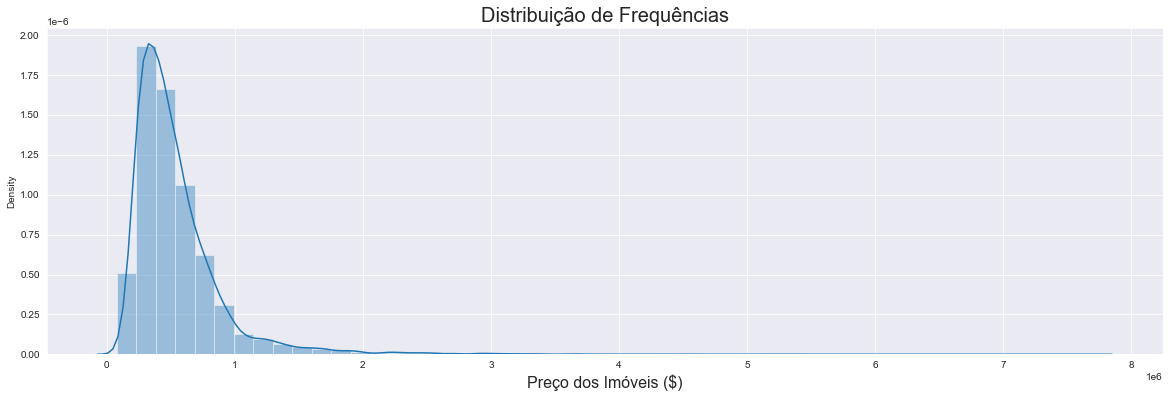

In [17]:
ax = sns.distplot(dados['price'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize = 20)
ax.set_xlabel('Preço dos Imóveis ($)', fontsize = 16)
ax

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Como esperado, existe uma assimetria à direita e ela pode ser observada pela cauda da nossa curva que cai drásticamente até o valor de 1.000.000,00 e se arrasta até o valor máximo de 7.700.000,00.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Plotaremos também um Box-plot para verificar a presença de outliers.

<AxesSubplot:title={'center':'Preço dos Imóveis'}, xlabel='Dólar'>

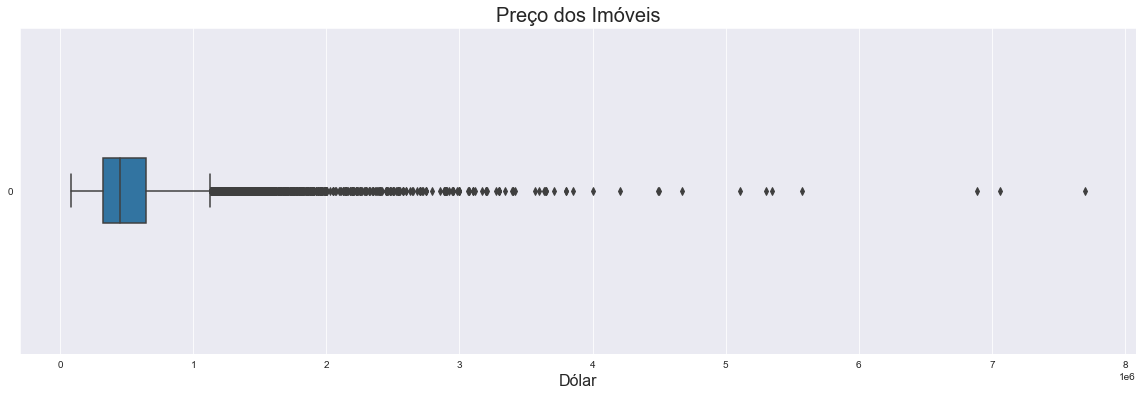

In [18]:
ax = sns.boxplot(data = dados['price'], orient = 'h', width = 0.2)
ax.figure.set_size_inches(20, 6)
ax.set_title('Preço dos Imóveis', fontsize = 20)
ax.set_xlabel('Dólar', fontsize = 16)
ax

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O desvio padrão elevado nos indicava a possível presença de diversos Outliers. Nesse caso os Outliers não necessariamente são erros, estamos analisando o preço de imóveis, é comum que existam uma quantidade maior de imóveis com valores mais baixos seguindo um mesmo padrão, e uma quantidade bem menor de imóveis com preços extremamente elevados. Ou seja, a concentração de imóveis de luxo é consideravelmente menor do que de imóveis mais baratos.

## Comportamento da variável Dependente em relação as variáveis Auxiliares

### price x sqft_living

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x720 with 0 Axes>

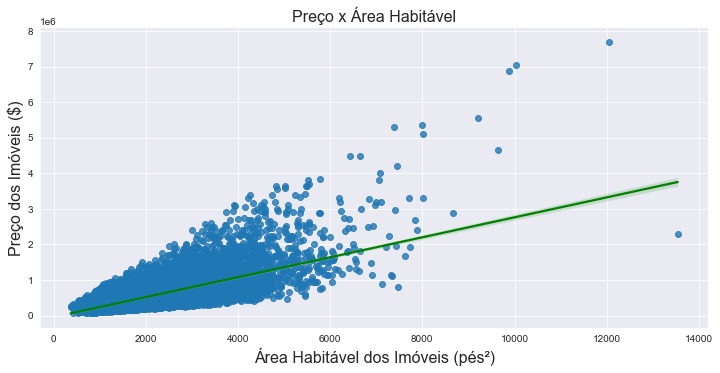

In [19]:
plt.figure(figsize=(20,10))
sns.lmplot(data = dados, x = 'sqft_living', y = 'price', aspect = 2, line_kws={'color': 'g'})
plt.title('Preço x Área Habitável', fontsize = 16)
plt.xlabel('Área Habitável dos Imóveis (pés²)', fontsize = 16)
plt.ylabel('Preço dos Imóveis ($)', fontsize = 16)
plt.show

<p style='font-size: 18px; line-height: 2; text-align: justify;'>   
No gráfico <b>Preço x Área Habitável</b>, podemos observar logo no início uma concentração maior onde os preços dos imóveis menores, assim como as áreas internas. A partir de 6000 pés quadrados de área ocorre uma dispersão dos dados, mesmo assim, a variável <b>sqft_living</b> possui uma forte correlação com o preço.

### price x sqft_lot

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x720 with 0 Axes>

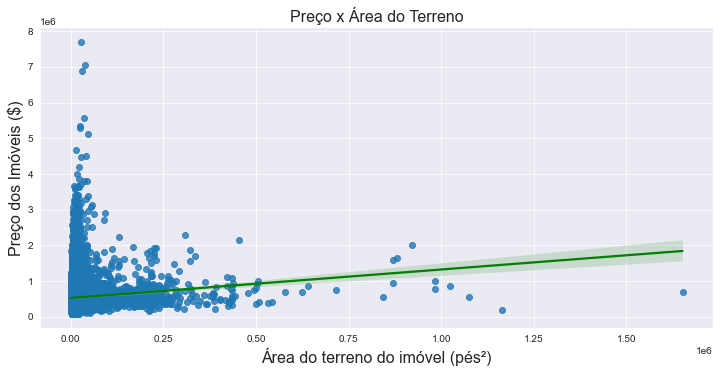

In [20]:
plt.figure(figsize=(20,10))
sns.lmplot(data = dados, x = 'sqft_lot', y = 'price', aspect = 2, line_kws={'color': 'g'})
plt.title('Preço x Área do Terreno', fontsize = 16)
plt.xlabel('Área do terreno do imóvel (pés²)', fontsize = 16)
plt.ylabel('Preço dos Imóveis ($)', fontsize = 16)
plt.show

<p style='font-size: 18px; line-height: 2; text-align: justify;'>   
No gráfico <b>Preço x Área do Terreno</b> é possível verificar uma tendência sutíl de inclinação da reta de regressão. Os dados estão mal distribuídos, a maior  parte está concentrada no início do gráfico, porém a dispersão dos dados vem logo em seguida. Isso pode indicar que existem terrenos enormes com pouca área construída quando comparado com o gráfico <b>Preço x Área Habitável</b> acima.

### price x grade

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x720 with 0 Axes>

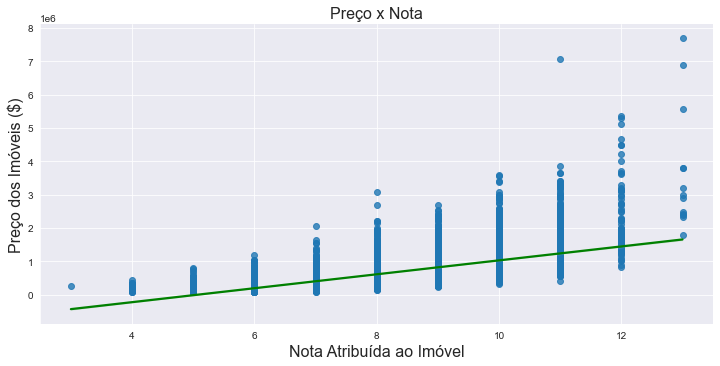

In [21]:
plt.figure(figsize=(20,10))
sns.lmplot(data = dados, x = 'grade', y = 'price', aspect = 2, line_kws={'color': 'g'})
plt.title('Preço x Nota', fontsize = 16)
plt.xlabel('Nota Atribuída ao Imóvel', fontsize = 16)
plt.ylabel('Preço dos Imóveis ($)', fontsize = 16)
plt.show

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
No gráfico <b>Preço x Nota</b> percebe-se que o preço do imóvel sobe conforme a nota atribuída. Porém a inclinação da reta não é tão íngrime, ou seja, apesar de ser a segunda maior correlação com o preço, não necessariamente imóveis com notas baixas possuem preços tão menores quanto imóveis com notas medianas, e até altas em alguns casos.

### price x sqft_above

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x720 with 0 Axes>

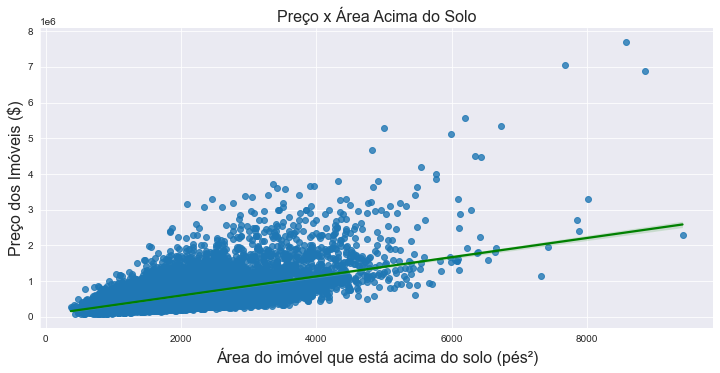

In [22]:
plt.figure(figsize=(20,10))
sns.lmplot(data = dados, x = 'sqft_above', y = 'price', aspect = 2, line_kws={'color': 'g'})
plt.title('Preço x Área Acima do Solo', fontsize = 16)
plt.xlabel('Área do imóvel que está acima do solo (pés²)', fontsize = 16)
plt.ylabel('Preço dos Imóveis ($)', fontsize = 16)
plt.show

<p style='font-size: 18px; line-height: 2; text-align: justify;'>   
O comportamento do gráfico <b>Preço x Área Acima do Solo</b> é bem pareceido com o gráfico <b>Preço x Área Habitável</b>. Observa-se  a maior concentração dos preços e da área no começo seguido de uma dispersão dos dados após o valor de 5000 pés quadrados aproximadamente.

### price x sqft_basement

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x720 with 0 Axes>

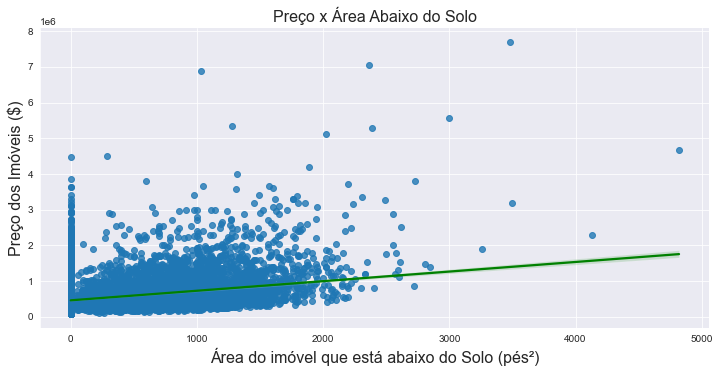

In [23]:
plt.figure(figsize=(20,10))
sns.lmplot(data = dados, x = 'sqft_basement', y = 'price', aspect = 2, line_kws={'color': 'g'})
plt.title('Preço x Área Abaixo do Solo', fontsize = 16)
plt.xlabel('Área do imóvel que está abaixo do Solo (pés²)', fontsize = 16)
plt.ylabel('Preço dos Imóveis ($)', fontsize = 16)
plt.show

<p style='font-size: 18px; line-height: 2; text-align: justify;'>   
O gráfico <b>Preço x Área Abaixo do Solo</b> apresenta uma concentração dos preços por volta do valor zero de área, o que indica imóveis que não possuem garagem subterrânea ou algum tipo de porão. A dispersão nesse caso ocorre por volta do valor de 2000 pés quadrados, e a reta possui uma inclinação suave.

### price x bathrooms

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x720 with 0 Axes>

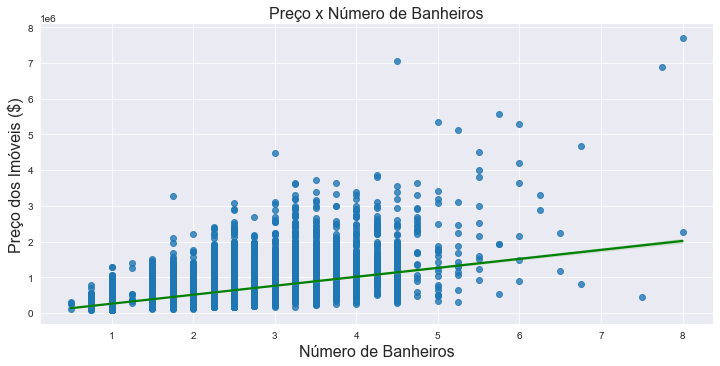

In [24]:
plt.figure(figsize=(20,10))
sns.lmplot(data = dados, x = 'bathrooms', y = 'price', aspect = 2, line_kws={'color': 'g'})
plt.title('Preço x Número de Banheiros', fontsize = 16)
plt.xlabel('Número de Banheiros', fontsize = 16)
plt.ylabel('Preço dos Imóveis ($)', fontsize = 16)
plt.show

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Antes de analisarmos o gráfico <b>Preço x Número de Banheiros</b>, devemos pontuar que essa variável possui valores que são estranhos quando olhamos primeira vez. Aqui no brasil não é comum contarmos o número de banheiros dessa forma. Por exemplo, 2.5 banheiros descreve uma casa que tem dois banheiros completos (Vaso sanitário, pia e chuveiro/banheira), o 0.5 refere-se a um outro banheiro que possui apenas um vaso sanitário e uma pia, mais conhecido como lavabo.

### price x bedrooms

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x720 with 0 Axes>

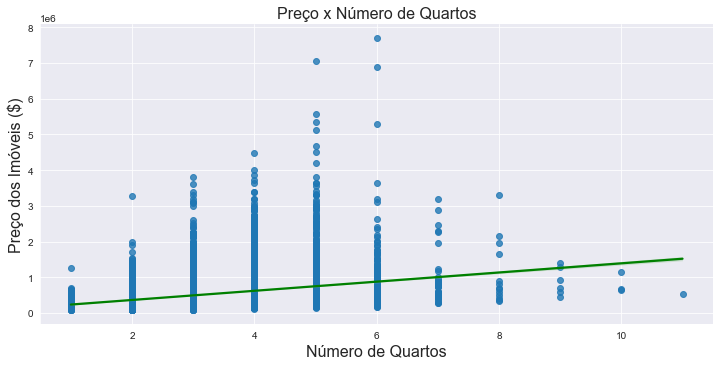

In [25]:
plt.figure(figsize=(20,10))
sns.lmplot(data = dados, x = 'bedrooms', y = 'price', aspect = 2, line_kws={'color': 'g'})
plt.title('Preço x Número de Quartos', fontsize = 16)
plt.xlabel('Número de Quartos', fontsize = 16)
plt.ylabel('Preço dos Imóveis ($)', fontsize = 16)
plt.show

<p style='font-size: 18px; line-height: 2; text-align: justify;'>  
A variável <b>bedrooms</b> nos apresenta um gráfico onde podemos verificar que o número de quartos se concentra na faixa entre 2 e 5, com o preço dos imóveis aumentando conforme aumentam o número de quartos, mas não possuindo uma variação tão elevada, podemos observar que a partir de 6 quartos o valor dos imóveis tende a diminuir, sendo possível encontrarmos imóveis baratos com um número bom de quartos.

### price x floors

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x720 with 0 Axes>

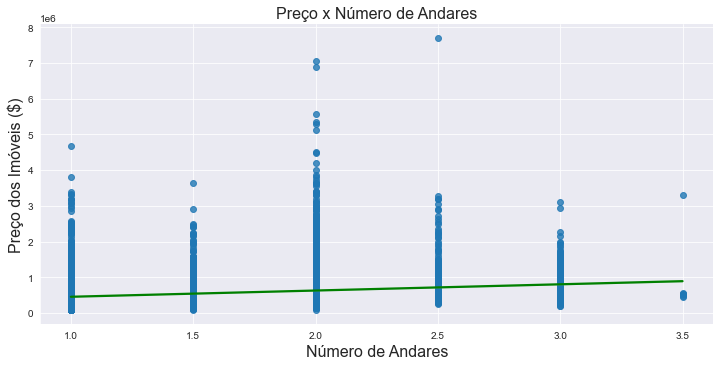

In [26]:
plt.figure(figsize=(20,10))
sns.lmplot(data = dados, x = 'floors', y = 'price', aspect = 2, line_kws={'color': 'g'})
plt.title('Preço x Número de Andares', fontsize = 16)
plt.xlabel('Número de Andares', fontsize = 16)
plt.ylabel('Preço dos Imóveis ($)', fontsize = 16)
plt.show

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O número de andares não parece influenciar tanto o preço dos imóveis. Conforme apresentado no gráfico, existem imóveis com mais andares e preços baixos, imóveis com preços altos e poucos andares, o que podem ser outliers, e imóveis com preços baixos e poucos andares.

### price x view

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x720 with 0 Axes>

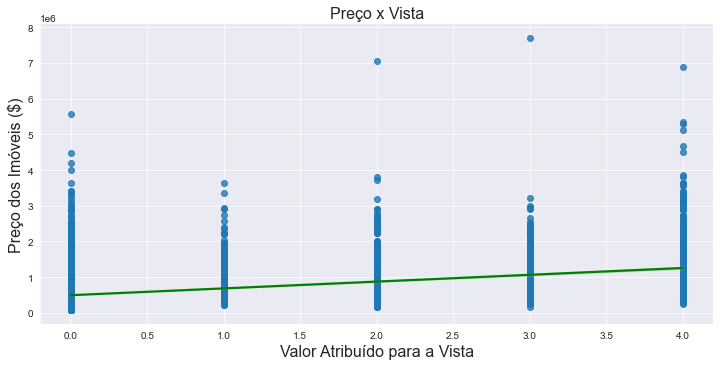

In [27]:
plt.figure(figsize=(20,10))
sns.lmplot(data = dados, x = 'view', y = 'price', aspect = 2, line_kws={'color': 'g'})
plt.title('Preço x Vista', fontsize = 16)
plt.xlabel('Valor Atribuído para a Vista', fontsize = 16)
plt.ylabel('Preço dos Imóveis ($)', fontsize = 16)
plt.show

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Analisando o gráfico <b>Preço x Vista</b> percebemos que, desconsiderando os outliers, os imóveis não possuem uma forte variação de notas atribuídas para a vista em relação ao preço, além disso, o preço da grande maioria dos imóveis se concentra até o valor de 4.000.000,00 dólares.

### price x condition

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x720 with 0 Axes>

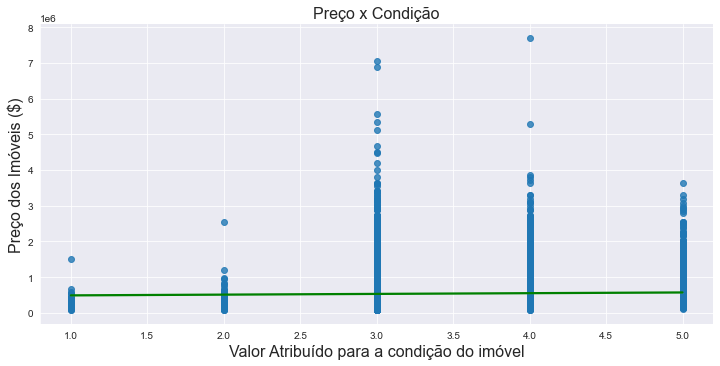

In [28]:
plt.figure(figsize=(20,10))
sns.lmplot(data = dados, x = 'condition', y = 'price', aspect = 2, line_kws={'color': 'g'})
plt.title('Preço x Condição', fontsize = 16)
plt.xlabel('Valor Atribuído para a condição do imóvel', fontsize = 16)
plt.ylabel('Preço dos Imóveis ($)', fontsize = 16)
plt.show

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Analisando o gráfico <b>Preço x Condição</b> vemos que a reta de regressão quase não possui inclinação, além disso, os valores 3 e 4 possuem o maior número de imóveis.

### price x waterfront

<function matplotlib.pyplot.show(close=None, block=None)>

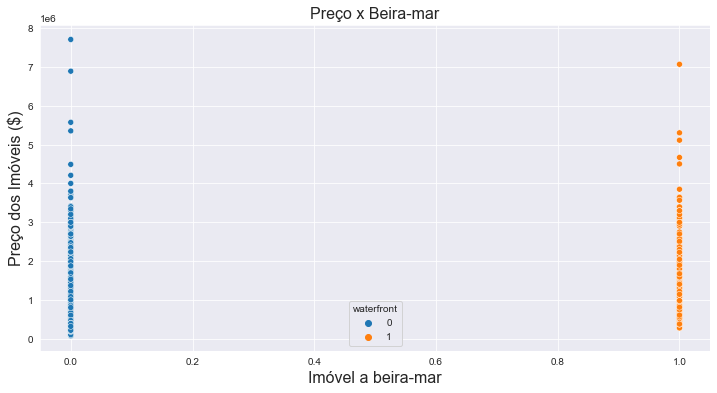

In [29]:
plt.figure(figsize=(12,6))
sns.scatterplot(data = dados, x = 'waterfront', y = 'price', hue = 'waterfront')
plt.title('Preço x Beira-mar', fontsize = 16)
plt.xlabel('Imóvel a beira-mar', fontsize = 16)
plt.ylabel('Preço dos Imóveis ($)', fontsize = 16)
plt.show

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
No gráfico <b>Preço x Beira-mar</b> temos a separação dos imóveis de maneira similar, não sendo possível estimar apenas pelo gráfico se a maioria dos imóveis está ou não a beira-mar. O preço dos imóveis varia bastante entre os extremos para ambos os casos. 

### price x yr_built

<function matplotlib.pyplot.show(close=None, block=None)>

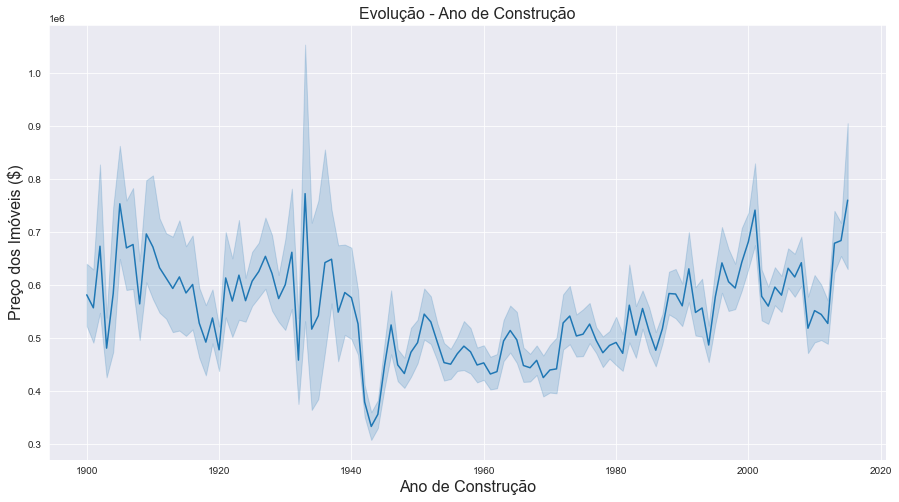

In [30]:
plt.figure(figsize=(15,8))
sns.lineplot(data = dados, x = 'yr_built', y = 'price')
plt.title('Evolução - Ano de Construção', fontsize = 16)
plt.xlabel('Ano de Construção', fontsize = 16)
plt.ylabel('Preço dos Imóveis ($)', fontsize = 16)
plt.show

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Por meio do gráfico <b>Evolução - Ano de Construção</b> é possível verificar que mesmo com as oscilações, os preços do imóveis mais antigos, a partir de 1910 até 1935, são maiores que nos demais anos. A partir do ano de 1940 ocorre uma queda grande no valor dos imóveis, que volta a aumentar conforme a passagem dos anos.

### price x yr_renovated

In [31]:
nao_reformados = len(dados.query('yr_renovated == 0'))
reformados = len(dados.query('yr_renovated != 0'))
total_imoveis = len(dados)

perc_reformados = round(reformados / total_imoveis, 3) * 100
perc_nao_reformados = round(nao_reformados / total_imoveis, 3) * 100

print(f'Percentual de Imóveis Reformados: {perc_reformados}%')
print(f'Percentual de Imóveis Não Reformados: {perc_nao_reformados}%')

Percentual de Imóveis Reformados: 4.2%
Percentual de Imóveis Não Reformados: 95.8%


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
A grande maioria dos imóveis não passaram por alguma reforma, então para analisar melhor a relação com o preço, vamos criar duas classes para analisar. A classe 'Sim' será composta por imóveis que foram reformados, e a classe 'Não', por imóveis que não foram reformados

In [32]:
dados['Foi Reformado?'] = dados['yr_renovated'].transform(lambda x: 'Sim' if x != 0 else 'Não')
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_date,mon_date,day_date,Foi Reformado?
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2014,10,13,Não
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,Sim
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,2015,2,25,Não
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,2014,12,9,Não
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,2015,2,18,Não


In [33]:
renovado = dados[dados['Foi Reformado?'] == 'Sim']
nao_renovado = dados[dados['Foi Reformado?'] == 'Não']

renovado = renovado.groupby('yr_built')[['price']].mean().reset_index()
nao_renovado = nao_renovado.groupby('yr_built')[['price']].mean().reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

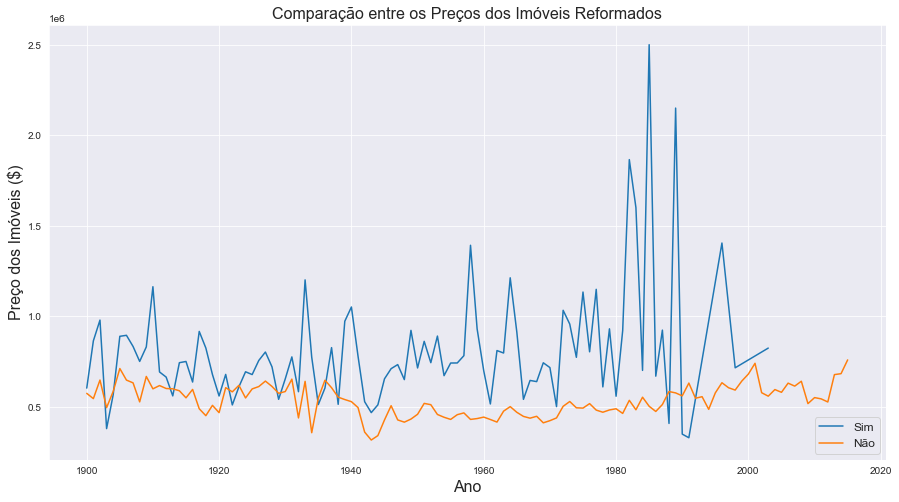

In [34]:
plt.figure(figsize=(15,8))
sns.lineplot(data = renovado, x = 'yr_built', y = 'price')
sns.lineplot(data = nao_renovado, x = 'yr_built', y = 'price')
plt.title('Comparação entre os Preços dos Imóveis Reformados', fontsize = 16)
plt.xlabel('Ano', fontsize = 16)
plt.ylabel('Preço dos Imóveis ($)', fontsize = 16)
plt.legend(labels=['Sim', 'Não'], fontsize='large', loc=4)
plt.show

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Como era esperado, os imóveis que passaram por algum tipo de reforma possuem valores maiores. Mesmo a maioria dos imóveis não sendo reformados, essa variável contribui para o aumento dos preços. Principalmente a partir de 1980 os maiores picos dos preços de venda pertencem a imóveis que foram reformados.

# Insights

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Após entender como o preço se comporta em conjunto com outras variáveis podemos agora partir para a geração de alguns insights que serão importantes para qualquer tomada de decisão.

## 1. Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Nos itens anteriores indentificamos quais variáveis contribuem para o aumento do preço dos imóveis. Para saber quais imóveis devem ser adquiridos podemos separa-los em grupos e dessa forma escolher o grupo que possui bons atributos, baseados nas variáveis analisadas, e preços acessíveis.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Uma das formas mais populares para calcular o número de classes que podemos usar é por meio da regra de Sturges.

In [35]:
# REGRA DE STURGES

n = dados.shape[0]
k = 1+ (10/3) * np.log10(n)
k = int(k.round(0))
k

15

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O agrupamento pelo método de Sturges oferece muitas classes. Os preços dos imóveis se concentra em determinadas faixas de valores, portanto vamos optar por criar por conta própria as classes que queremos. Abaixo estão as classes estimadas.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
<b>A</b> ► Acima de 4.000.001,00
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
<b>B</b> ► De 2.000.001,00 a 4.000.000,00
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
<b>C</b> ► De 1.000.001,00 a 2.000.000,00
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
<b>D</b> ► De 500.001,00 a 1.000.000,00
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
<b>E</b> ► Até 500.000,00

In [36]:
classes = [0, 500000, 1000000, 2000000, 4000000, 7700000]
labels = ['E', 'D', 'C', 'B', 'A']
freq = pd.value_counts(pd.cut(x = dados['price'], bins = classes, labels = labels, 
                              include_lowest = True))
freq_perc = pd.value_counts(pd.cut(x = dados['price'], bins = classes, labels = labels, 
                              include_lowest = True), normalize = True)
dist_freq = pd.DataFrame({'Frequência': freq, 'Porcentagem (%)': freq_perc})
dist_freq = dist_freq.sort_index(ascending = False)
dist_freq

,Frequência,Porcentagem (%)
A,11,0.000509
B,187,0.008659
C,1265,0.058576
D,7587,0.351315
E,12546,0.580941


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Como podemos observar, a maioria dos imóveis se encontram nas classes <b>E</b> e <b>D</b>. As análises previamente realizadas apontavam essa tendência, principalmente o histograma <b>Distribuição de Frequências</b>.
<p style='font-size: 18px; line-height: 2; text-align: justify;'>    
Dentro dos pontos analisados, os imóveis que deverão ser adquiridos fazem parte das classes <b>E</b> e <b>D</b>. Mas não só isso, a empresa deve procurar por imóveis que além de pertencerem a essas classes, possuam data de construção a partir de 1980 devido ao retorno do aumento dos preços mostrando uma tendência de valorização dos imóveis ao longo do tempo. Imóveis também que possuem uma boa área habitável e notas altas são possíveis bons negócios se o preço estiver dentro das classes <b>E</b> e <b>D</b>. Quanto ao número de quartos, vimos que apesar de ter influência no valor do imóvel, não deve ser prioridade na hora da aquisição. Ao contrário do número de banheiros, que apresenta uma tendência sempre a aumentar o preço dos imóveis conforme aumenta o seu número.

## 2. Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
A análise proposta é extremamente complexa então primeiro precisamos entender alguns pontos importantes.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Em geral, imóveis possuem a tendência a valorizar positivamente como patrimônio, mesmo que ocorra em determinados períodos alguma oscilação negativa, no longo prazo um imóvel é visto como possível investimento devido a essa tendência de valorização.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Diversas variáveis que não foram analisadas previamente podem impactar a tendência de valorização como o zipcode. Mesmo que um imóvel em determinada data de construção não possua grande variação de preço entre zipcodes diferentes, a valorização de cada região é diferente, o que influencia no preço futuro de venda.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O mercado imobiliário passa por diversas oscilações, é comum que crises econômicas afetem esse mercado negativamente promovendo uma desvalorização. Por outro lado, fatores como redução de juros, ofertas de financiamento, geração de empregos, podem aquecer esse mercado causando uma valorização. A inflação também é outro fator que pode promover o aumento do preço dos imóveis.

### Agrupando dados a partir de 1980

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Portanto, a fim de facilitar, vamos dividir nossa análise da seguinte forma. Primeiro criaremos um DataFrame apenas com os imóveis com data de construção maiores ou iguais a 1980. Depois vamos agrupar esse DataFrame pelo ano de construção com a mediana do preço dos imóveis. A escolha da mediana é devido a quantidade de valores discrepantes que possuímos, o que pode distorcer a média. Criaremos duas colunas, uma contento a variação em dólares da mediana dos preços dos imóveis e outra com a varivação percentual. Plotaremos um gráfico dessa variação percentual a fim de melhorar a visualização.

In [37]:
dados_1980 = dados.query('yr_built >= 1980')
dados_1980_agrupados = dados_1980.groupby('yr_built')[['price']].median()
dados_1980_agrupados['price_var'] = dados_1980_agrupados.diff()
dados_1980_agrupados['price_var_perc (%)'] = dados_1980_agrupados['price'].pct_change() * 100
dados_1980_agrupados.T

yr_built,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
price,401100.0,420000.000000,440000.000000,440000.0,509900.000000,439950.000000,419500.000000,471500.000000,500000.000000,490000.0,...,511000.000000,480000.000000,500000.000000,416375.000,448500.000000,440000.000000,448475.000000,565000.000000,599000.000000,629500.00000
price_var,NaN,18900.000000,20000.000000,0.0,69900.000000,-69950.000000,-20450.000000,52000.000000,28500.000000,-10000.0,...,25000.000000,-31000.000000,20000.000000,-83625.000,32125.000000,-8500.000000,8475.000000,116525.000000,34000.000000,30500.00000
price_var_perc (%),NaN,4.712042,4.761905,0.0,15.886364,-13.718376,-4.648255,12.395709,6.044539,-2.0,...,5.144033,-6.066536,4.166667,-16.725,7.715401,-1.895206,1.926136,25.982496,6.017699,5.09182


<function matplotlib.pyplot.show(close=None, block=None)>

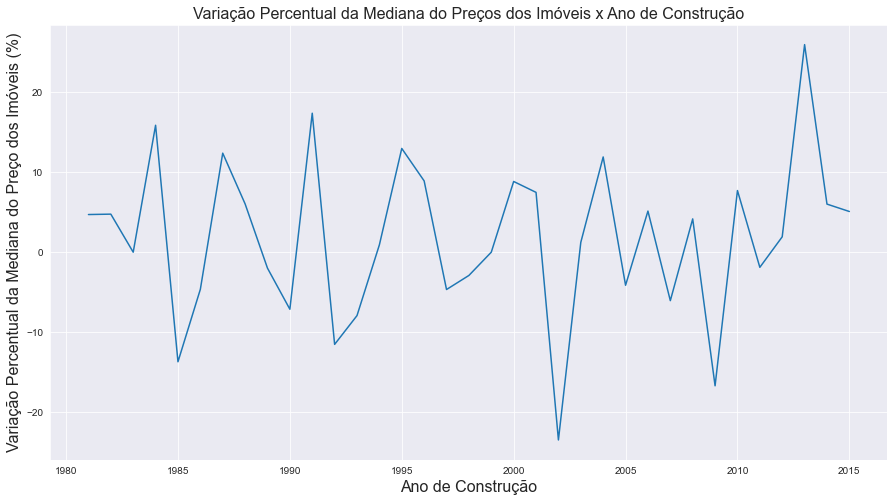

In [38]:
plt.figure(figsize=(15,8))
sns.lineplot(data = dados_1980_agrupados, x = 'yr_built', y = 'price_var_perc (%)')
plt.title('Variação Percentual da Mediana do Preços dos Imóveis x Ano de Construção', fontsize = 16)
plt.xlabel('Ano de Construção', fontsize = 16)
plt.ylabel('Variação Percentual da Mediana do Preço dos Imóveis (%)', fontsize = 16)
plt.show

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Por meio do gráfico podemos perceber que não existe uma lineraridade entre a variação percentual da mediana dos preços do imóveis e o ano de construção. Dessa forma, um possível opção para escolher o melhor momento para a venda é observar os anos que possuem as tendências positivas demonstrando uma valorização dos preços. Quanto ao preço de venda, ele pode ser estimado com base nas classes determinadas anteriormente, onde um imóvel pertencente a uma classe de valor baixo pode subir de classe dependendo de sua valorização.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
De novo é importante reforçar que esse tipo de análise é complexa e deve ser realizada com estudos mais completos e detalhados.

## 3. A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Como visto previamente, imóveis que foram reformados possuem preços mais elevados, portanto <b>sim</b>, é vantajoso fazer alguma reforma a fim de aumentar o preço de venda.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Aqui vamos pensar da seguinte forma, por meio de uma técnica de regressão linear podemos estimar valores médios para o preço de um imóvel em função de determinadas variáveis. Dessa forma ao estimar entradas para o modelo, verificamos a variação do preço, e assim podemos optar por algum item que será uma boa opção para se incluir em uma reforma futura.

### Transformação dos dados

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Os testes paramétricos assumem que os dados amostrais coletados de uma população, com distribuição de probabilidade conhecida, possuam a forma de uma distribuição normal, ou seja, simétrica. Não é o nosso caso, portanto vamos transformar os nossos dados a fim de obter uma distribuição mais simétrica possível para melhorar nosso modelo.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Nesse caso, vamos usar a transformação logarítmica, pois é em geral, usada quando os dados possuem uma distribuição distorcida positiva e valores grandes.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O modelo englobará a variável alvo <b>price</b> e as variáveis previamente analisadas: <b>sqft_living</b>, <b>sqft_lot</b>, <b>grade</b>, <b>sqft_above</b>, <b>sqft_basement</b>, <b>bathrooms</b>, <b>bedrooms</b>, <b>floors</b>, <b>view</b>, <b>condition</b>, <b>waterfront</b> e <b>yr_built</b>.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Dentre elas, <b>sqft_basement</b>, <b>view</b> e <b>waterfront</b> possuem valores 0, portanto ao passarmos para a escala logarítmica somaremos 1, pois o log de 1 é 0. Lembrando que excluímos os valores 0 das variáveis <b>bathrooms</b> e <b>bedrooms</b> anteriormente.

In [39]:
# CRIANDO UM NOVO DATAFRAME SOMENTE COM AS VARIÁVEIS QUE ENTRARÃO NO MODELO

dados_log = pd.DataFrame({'log_price': np.log(dados['price']),
                          'log_sqft_living': np.log(dados['sqft_living']),
                          'log_sqft_lot': np.log(dados['sqft_lot']),
                          'log_grade': np.log(dados['grade']),
                          'log_sqft_above': np.log(dados['sqft_above']),
                          'log_sqft_basement': np.log(dados['sqft_basement'] + 1),
                          'log_bathrooms': np.log(dados['bathrooms']),
                          'log_bedrooms': np.log(dados['bedrooms']),
                          'log_floors': np.log(dados['floors']),
                          'log_view': np.log(dados['view'] + 1),
                          'log_condition': np.log(dados['condition']),
                          'log_waterfront': np.log(dados['waterfront'] + 1), 
                          'log_yr_built': np.log(dados['yr_built'])
                         })
dados_log.head()

,log_price,log_sqft_living,log_sqft_lot,log_grade,log_sqft_above,log_sqft_basement,log_bathrooms,log_bedrooms,log_floors,log_view,log_condition,log_waterfront,log_yr_built
0,12.309982,7.073270,8.639411,1.945910,7.073270,0.000000,0.000000,1.098612,0.000000,0.0,1.098612,0.0,7.578145
1,13.195614,7.851661,8.887653,1.945910,7.682482,5.993961,0.810930,1.098612,0.693147,0.0,1.098612,0.0,7.576097
2,12.100712,6.646391,9.210340,1.791759,6.646391,0.000000,0.000000,0.693147,0.000000,0.0,1.098612,0.0,7.566828
3,13.311329,7.580700,8.517193,1.945910,6.956545,6.814543,1.098612,1.386294,0.000000,0.0,1.609438,0.0,7.583248
4,13.142166,7.426549,8.997147,2.079442,7.426549,0.000000,0.693147,1.098612,0.000000,0.0,1.098612,0.0,7.594381


### Verificação da variável Dependente transformada - price

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Plotaremos a distribuição de frequências do preço dos imóveis após a transformação para avaliar a simetria.

<AxesSubplot:title={'center':'Distribuição de Frequências Transformada'}, xlabel='log do Preço dos Imóveis ($)', ylabel='Density'>

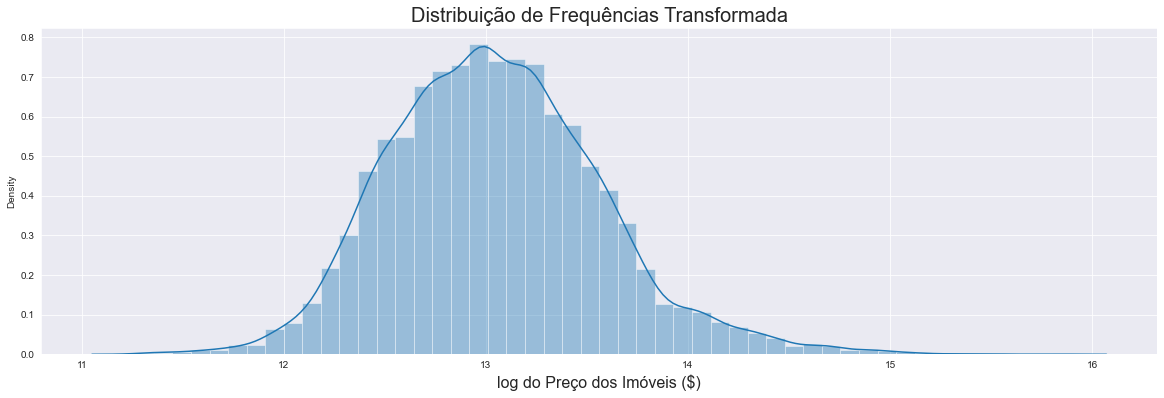

In [40]:
ax = sns.distplot(dados_log['log_price'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências Transformada', fontsize = 20)
ax.set_xlabel('log do Preço dos Imóveis ($)', fontsize = 16)
ax

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Conseguimos eliminar um pouco aquele efeito de assimetria à direita. Ainda podemos perceber uma assimetria menor à direita, mas agora obtivemos um gráfico mais próximo à distribuição normal que estamos tentando alcançar.

### Datasets de teste e de treino

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Devemos dividir o nosso DataFrame em duas partes, a primeira irá conter uma Series com o preço dos imóveis, e a segunda parte será um outro DataFrame com as variáveis auxiliares. Ambas as partes estarão com os valores transformados para a escala logarítmica.

In [41]:
y = dados_log['log_price']
X = dados_log[['log_sqft_living', 'log_sqft_lot', 'log_grade', 'log_sqft_above', 'log_sqft_basement', 'log_bathrooms',
               'log_bedrooms', 'log_floors', 'log_view', 'log_waterfront', 'log_condition', 'log_yr_built']]

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Feito isso, dividiremos os conjuntos criados em datasets de teste e de treino. O objetivo é modelar a regressão e testá-la, dividindo uma pequena porcentagem para os testes do modelo e o restante para o treino. No caso vamos optar por 20% dos dados serem selecionados de forma aleatória para o teste.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Nosso modelo terá a constante intercepto, por esse motivo adicionaremos essa constante em um novo dataset X de treino.

In [43]:
X_train_const = sm.add_constant(X_train)

### Avaliação das estatísticas do modelo

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Com o auxílio do statsmodels vamos realizar o teste dos Mínimos Quadrados Ordinários, que visa encontrar o melhor ajuste para o conjunto de dados a fim de minimizar a soma dos quadrados dos resíduos (diferença), entre o valor estimado e os dados observados, podendo aumentar o grau de ajuste do modelo.

In [44]:
modelo_statsmodels = sm.OLS(y_train, X_train_const, hasconst = True).fit()

In [45]:
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     2693.
Date:                Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                        19:10:08   Log-Likelihood:                -4347.3
No. Observations:               17276   AIC:                             8721.
Df Residuals:                   17263   BIC:                             8821.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                89.9702      1.627     55.315      0.000      86.782      93.158
log_sqft_living       0.2609      0.029      8.987      0.000       0.204       0.318
log_sqft_lot         -0.0344      0.003    -10.475      0.000      -0.041      -0.028
log_grade             1.7584      0.027     65.696      0.000       1.706       1.811
log_sqft_above        0.2101      0.028      7.415      0.000       0.155       0.266
log_sqft_basement     0.0181      0.002      9.487      0.000       0.014       0.022
log_bathrooms         0.1016      0.011      9.167      0.000       0.080       0.123
log_bedrooms         -0.1701      0.011    -14.938      0.000      -0.192      -0.148
log_floors            0.0893      0.010      8.539      0.000       0.069       0.110
log_view              0.1173      0.007     15.763      0.000       0.103       0.132
log_waterfront        0.5969      0.042     14.256      0.000       0.515       0.679
log_condition         0.1304      0.014      9.187      0.000       0.103       0.158
log_yr_built        -11.0484      0.214    -51.608      0.000     -11.468     -10.629
==============================================================================
Omnibus:                       75.563   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.418
Skew:                          -0.002   Prob(JB):                     1.28e-23
Kurtosis:                       3.383   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Dentro do sumário vamos focar no Teste F e no Teste T. O valor de aceitação <b>Prob (F-statistic)</b> indica a significância geral da regressão. Como o valor é menor que 0.05, os parâmetros em conjunto são estatisticamente significativos. No caso do Teste T, os valores de <b>P>|t|</b> são analisados individualmente, porém da mesma forma que no Teste F, como os valores são menores que 0.05, consideramos que os parâmetros individualmente são estatisticamente significativos.

### Estimando o modelo com os dados de treino e comparando com os dados de teste

In [46]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_previsto = modelo.predict(X_test)
print('R² para os dados de treino = {}'.format(modelo.score(X_train, y_train).round(3)))
print('R² para os dados de teste = %s' % metrics.r2_score(y_test, y_previsto).round(3))

R² para os dados de treino = 0.652
R² para os dados de teste = 0.631


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Não há diferença significativa entre os valores.

### Simulação

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Com o modelo estimado, podemos criar um simulador para obter os valores médios do preço dos imóveis, alterando os valores de entrada das variáveis auxiliares.

In [47]:
sqft_living = 6000
sqft_lot = 12000
grade = 8
sqft_above = 6000
sqft_basement = 0
bathrooms = 3
bedrooms = 2
floors = 1
view = 3
condition = 3
waterfront = 0
yr_built = 2000
 
entradas_simulador = [[np.log(sqft_living), np.log(sqft_lot), np.log(grade), np.log(sqft_above),
                       np.log(sqft_basement + 1), np.log(bathrooms), np.log(bedrooms), np.log(floors),
                       np.log(view + 1), np.log(condition), np.log(waterfront + 1), np.log(yr_built)]]

saida_preco = np.exp(modelo.predict(entradas_simulador)[0])

print('O valor do imóvel escolhido é de R${0:.2f}'.format(saida_preco))

O valor do imóvel escolhido é de R$1522650.31


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O modelo possui alguns pontos que são necessários destacar. Algumas variáveis como <b>sqft_lot</b> e <b>bedrooms</b> estão diminuindo o valor dos imóveis e esse comportamento é estranho, uma vez que vimos acima que a correlação era positiva.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
No caso da variável <b>sqft_lot</b> a explicação para isso pode ser a grande dispersão dos dados e sua baixa correlação com o preço dos imóveis.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O preço dos imóveis tende a diminuir após o valor de 6 quartos. Isso pode ser um motivo de a variável <b>bedrooms</b> estar apresentando a tendência negativa no modelo.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
A variável <b>yr_built</b> possui o mesmo comportamento, e vimos anteriormente que não há uma boa linearidade nessa variável, os imóveis antigos possuíam valores elevadíssimos, a partir de 1940 o valor cai consideravelmente e após 1980 é que voltamos a ver um crescimento expressivo dos valores. Isso pode até contribuir para um modelo não tão bem ajustado.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Mesmo assim, a House Rocket caso opte por fazer algum tipo de reforma em seus imóveis, uma boa opção é o aumento do número de banheiros. Previamente vimos que imóveis com mais de 6 quartos tendem a ter preços mais baixos, porém o valor dos imóveis com mais banheiros sempre tende a crescer, o que indica que a variável <b>bathrooms</b> pode ser a melhor escolha para uma reforma.

### Análise Gráfica da Simulação

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Faremos uma análise gráfica das previsões a fim de idenficar alguma inconsistência, além disso, analisaremos se a variância dos resíduos é constante ou não.

In [48]:
y_previsto_train = modelo.predict(X_train)

<AxesSubplot:title={'center':'Log Previsão X Log Real'}, xlabel='Log Preço dos Imóveis ($) - Previsão', ylabel='Log Preço dos Imóveis ($) - Real'>

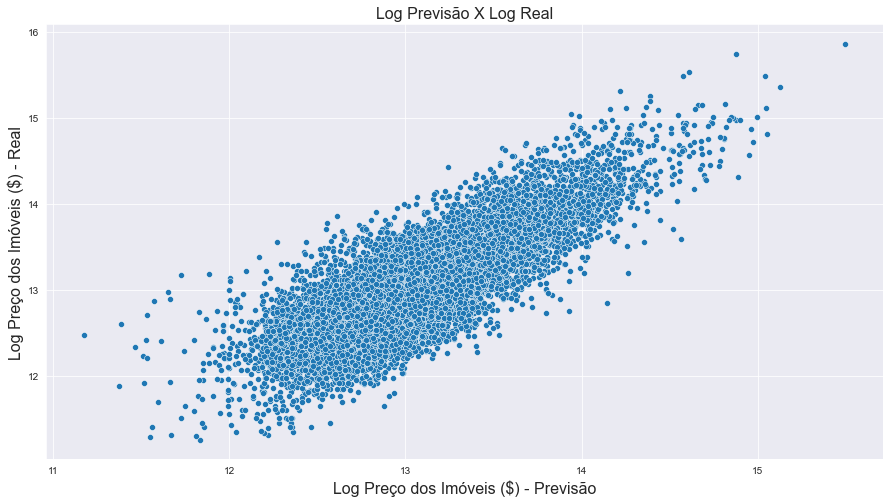

In [49]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(15,8)
ax.set_title('Log Previsão X Log Real', fontsize=16)
ax.set_xlabel('Log Preço dos Imóveis ($) - Previsão', fontsize=16)
ax.set_ylabel('Log Preço dos Imóveis ($) - Real', fontsize=16)
ax

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Tanto no começo quanto no final do gráfico as previsões apresentam dispersões, ou seja, para valores baixos e altos de preço.

In [50]:
residuo = y_train - y_previsto_train

<AxesSubplot:title={'center':'Resíduos² X Log Previsão'}, xlabel='Log Preço dos Imóveis ($) - Previsão', ylabel='Resíduos²'>

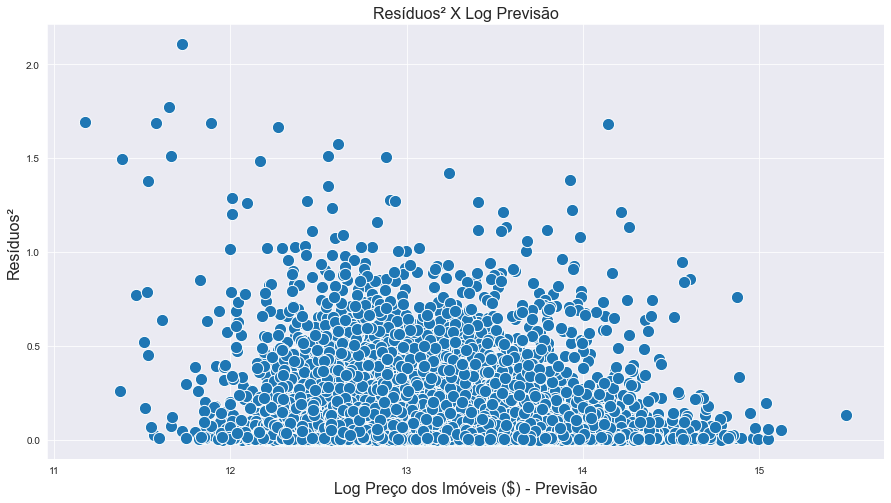

In [51]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(15, 8)
ax.set_title('Resíduos² X Log Previsão', fontsize=16)
ax.set_xlabel('Log Preço dos Imóveis ($) - Previsão', fontsize=16)
ax.set_ylabel('Resíduos²', fontsize=16)
ax

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Verifica-se que a variância dos resíduos parece ser constante apesar de aguns dados estarem dispersos, ou seja, sugere que talvez não haja heterocedasticidade nos dados. Podemos verificar isso por meio da distribuição de frequência dos resíduos.

<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='Log do Preço dos Imóveis ($)', ylabel='Density'>

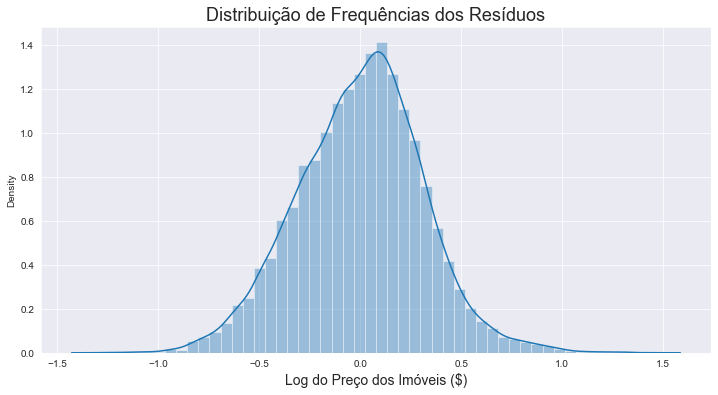

In [52]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Log do Preço dos Imóveis ($)', fontsize=14)
ax

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
A curva se assemelha a uma distribuição normal porém existe uma pequena assimetria.

# Sugestões

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
É importante entender que esse estudo não tem objetivo de ser comercializado, e sim apenas tentar entender o comportamento dos dados apresentados e obter possíveis insights. Portanto, para melhorar esse estudo alguns passos como, obter mais dados, refinar a fonte dos dados, estimar análises mais detalhadas sobre o mercado imóbiliário e treinar outros modelos que possam perfomar melhor, serão de extrema importância.

# Conclusão

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Dentre os insights que respondemos acima podemos concluir que os melhores imóveis para aquisição são os imóveis com ano de construção a partir de 1980 e fazem parte das classes <b>E</b> e <b>D</b>. Após a aquisição de algum imóvel, a House Rocket poderá analisar a tendência do mercado imobiliário para escolher o melhor momento para revender tal imóvel. Outro ponto importante é que caso a House Rocket esteja pensando em reformar algum imóvel adquirido a tendência é que o imóvel valorize e o preço aumente, e a empresa pode também optar por aumentar o número de banheiros o que apresentou ser favorável ao aumento do preço do imóvel. 

# Referências

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Meigarom. Os 5 Projetos de Data Science Que Fará o Recrutador Olhar para Você!. Medium, 2020. Disponível em: https://medium.com/@meigarom/os-5-projetos-de-data-science-que-far%C3%A1-o-recrutador-olhar-para-voc%C3%AA-c32c67c17cc9. Acesso em: 16 de fevereiro de 2022.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
PEREZ, José. What Does 2.5 Bathrooms Mean?. HouseNotebook, 2021. Disponível em: https://housenotebook.com/what-does-2-5-bathrooms-mean/. Acesso em: 22 de fevereiro de 2022.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
UNITE STATES ZIP CODES. UniteStatesZipCodes.org. Disponível em: https://www.unitedstateszipcodes.org/wa/. Acesso em: 20 de fevereiro de 2022.